<font size=7>STTC Plots

In [2]:
from human_hip import spike_data

In [3]:
import numpy as np                                                    # Packages for data analysis
import matplotlib.pyplot as plt
from human_hip.spike_data import correlation_matrix, eigenvalues_eigenvectors, plot_eigenvectors #firing_rates,
import scipy.cluster.hierarchy as sch

# First Eigenvector for HC112823

In [5]:
sd = spike_data.read_autocurated_data( "/workspaces/human_hippocampus/data/ephys/2023-12-03-e-Hc112823_avv9hckcr1/derived/kilosort2/Hc112823_avv9hckcr1_21841_120323_3_acqm.zip" )
#sd = spike_data.read_phy_files("/workspaces/human_hippocampus/data/ephys/2023-12-11-e-Hc120523_aav9hckcr1_chip21769/elliott/elliott_chip21769_2.zip")


In [6]:
# def plot_sttc_matrix( sd, blur=20, sttc_cutoff_high=1.1, plot_color="magma" ):
#     """
#     Outputs: plots the STTC and Correlation matrices for neurons in a recording
#     Input: 
#         sd: spike_data object, the standard data type used by braingeneers 
#         plot_color: string, the color map to use for the plots. Good colors include: "magma", "viridis", "plasma", "inferno"
#     """
#     STTC = sd.spike_time_tilings( blur )  # get the spike time tiling matrix
#     STTC = np.where(STTC<sttc_cutoff_high, STTC, STTC*0)
                      
#     # subplot of STTC 
#     plt.imshow(STTC, cmap=plot_color)       # Show the STTC matrix
#     plt.title("STTC")         # Set the title, x and y labels
#     plt.xlabel("Neuron")
#     plt.ylabel("Neuron")
#     plt.colorbar( shrink=0.3) # Add a colorbar to the plot


In [14]:
# def plot_sttc_matrix( sd, blur=20, sttc_cutoff_high=1.1, plot_color="magma" ):
#     """
#     Outputs: plots the STTC and Correlation matrices for neurons in a recording
#     Input: 
#         sd: spike_data object, the standard data type used by braingeneers 
#         plot_color: string, the color map to use for the plots. Good colors include: "magma", "viridis", "plasma", "inferno"
#     """
#     STTC = sd.spike_time_tilings( blur )  # get the spike time tiling matrix
#     STTC = np.where(STTC<sttc_cutoff_high, STTC, STTC*0)
                      
#     # subplot of STTC 
#     plt.imshow(STTC, cmap=plot_color)       # Show the STTC matrix
#     plt.title("STTC Matrix")         # Set the title, x and y labels
#     plt.xlabel("Neuron")
#     plt.ylabel("Neuron")
#     plt.colorbar( shrink=.8) # Add a colorbar to the plot


In [80]:
# plot_sttc_matrix( sd, sttc_cutoff_high=0.3 )

In [125]:
sttc_matrix = sd.spike_time_tilings()
sttc_eigenvalues, sttc_eigenvectors = eigenvalues_eigenvectors(sttc_matrix)
x = sttc_eigenvectors[:,0]
x_normalized = (x - np.min(x)) / (np.max(x) - np.min(x))

(-1.0, 60.0)

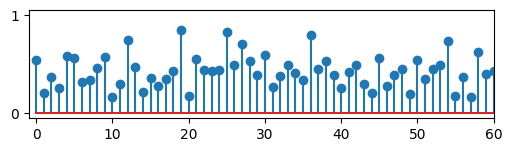

In [148]:
#marker_style = dict(marker='o', markersize=10, markerfacecolor='r')
#line_style = dict(color='b', linewidth=2)

plt.figure(figsize=(6,1.4)) 
plt.stem( x_normalized )
plt.yticks([0, 1])
plt.xlim(-1, 60)

In [118]:
def plot_eigenvectors(sd, n_eigenvectors=5 ):
    corr_matrix = correlation_matrix(sd)
    sttc_matrix = sd.spike_time_tilings()
    corr_eigenvalues, corr_eigenvectors = eigenvalues_eigenvectors(corr_matrix)
    sttc_eigenvalues, sttc_eigenvectors = eigenvalues_eigenvectors(sttc_matrix)
    
    #fig, axs = plt.subplots(5, 2, figsize=(12,8)) #,  )

    for i in range(n_eigenvectors):
        #if i: plt.xticks([])
        axs[i,0].stem(sttc_eigenvectors[:,i])
        axs[i,1].stem(corr_eigenvectors[:,i])
        axs[i,0].set(ylabel= f"{i+1}")
        
        ylim_min = np.min([sttc_eigenvectors[:,i], corr_eigenvectors[:,i]]) -.1
        ylim_max = np.max([sttc_eigenvectors[:,i], corr_eigenvectors[:,i]]) +.1
        axs[i,0].set_ylim(ylim_min, ylim_max)
        axs[i,1].set_ylim(ylim_min, ylim_max)

    #for ax in fig.get_axes():
    #    ax.label_outer()
    axs[0, 0].set_title("STTC")
    axs[0, 1].set_title("Correlation")


In [119]:
plot_eigenvectors(sd)

NameError: name 'axs' is not defined

#  HC112823 Clustered

<font color="red"> This code was from chatgpt. I mixed it with the link below to get things working

<font color="red"> The code form the link below is also worth trying:
https://github.com/TheLoneNut/CorrelationMatrixClustering/blob/master/CorrelationMatrixClustering.ipynb


In [161]:
sd = spike_data.read_autocurated_data( "/workspaces/human_hippocampus/data/ephys/2023-12-03-e-Hc112823_avv9hckcr1/derived/kilosort2/Hc112823_avv9hckcr1_21841_120323_3_acqm.zip" )


(array([2.000e+00, 6.000e+00, 6.000e+00, 0.000e+00, 4.000e+00, 1.200e+01,
        1.000e+01, 1.200e+01, 1.800e+01, 4.000e+01, 3.400e+01, 5.000e+01,
        8.800e+01, 1.000e+02, 1.860e+02, 2.460e+02, 4.880e+02, 7.540e+02,
        1.614e+03, 3.012e+03, 4.550e+03, 5.568e+03, 5.262e+03, 4.692e+03,
        3.868e+03, 2.888e+03, 2.312e+03, 1.642e+03, 1.346e+03, 1.112e+03,
        8.880e+02, 7.060e+02, 6.000e+02, 4.300e+02, 3.540e+02, 2.620e+02,
        2.200e+02, 1.840e+02, 1.200e+02, 1.400e+02, 1.240e+02, 9.200e+01,
        8.200e+01, 6.600e+01, 6.200e+01, 9.600e+01, 4.800e+01, 3.200e+01,
        4.000e+01, 3.600e+01, 3.200e+01, 2.600e+01, 3.400e+01, 1.400e+01,
        2.000e+01, 1.400e+01, 1.400e+01, 1.600e+01, 1.600e+01, 1.600e+01,
        8.000e+00, 8.000e+00, 2.000e+00, 0.000e+00, 4.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

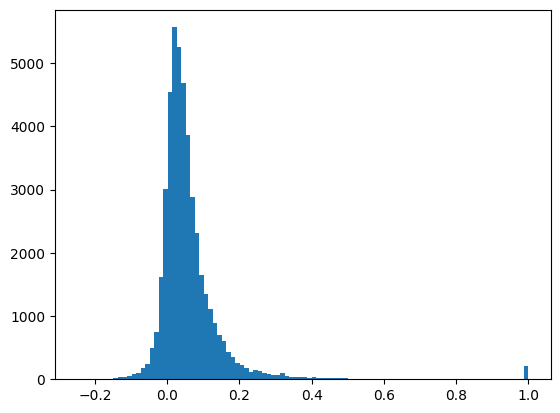

In [162]:
neo = sd.spike_time_tilings()
plt.hist( neo.flatten(), bins=100 )

In [163]:
np.sum(neo.flatten()<0.3)/neo.size

0.9830455678177288

In [164]:
neo = sd.spike_time_tilings()
sttc_cuttoff = 0.3
neo = np.where( neo<sttc_cuttoff, neo, neo*0 ) #+sttc_cuttoff )
#neo = np.where( neo<sttc_cuttoff, neo, (neo*0)+sttc_cuttoff ) #+sttc_cuttoff )

In [165]:
# Perform hierarchical clustering
# d = sch.distance.pdist(neo)  # vector of pairwise distances
# L = sch.linkage(d, method='complete')  # linkage matrix
# ind = sch.fcluster(L, 0.5 * d.max(), 'distance')  # cluster indices

d = sch.distance.pdist(neo)  # vector of pairwise distances
L = sch.linkage(d, method='complete')  # linkage matrix
ind = sch.leaves_list(sch.optimal_leaf_ordering(L, d))  # optimal leaf ordering


In [166]:
ind2 = sch.fcluster(L, 0.5 * d.max(), 'distance')
ind2

array([ 8,  1,  8,  3,  8, 10,  3,  8,  8, 10,  3,  3, 12, 10,  3,  8,  3,
        3,  8, 11,  2,  8, 10,  9,  8, 11, 10,  6, 15,  8, 15,  3,  8,  9,
        9,  9,  6, 10,  4,  9,  3,  8,  8,  3,  3, 15,  3,  8,  8,  2, 15,
        8,  8,  8,  7,  2, 10,  2, 10,  8,  9,  3, 11,  8,  9,  3,  8,  8,
        7,  8,  8,  8,  3,  8, 12, 14,  8,  9,  8,  9,  8, 14,  3,  2,  8,
        2,  6,  8,  9,  3, 13,  8,  3,  5, 14, 10,  9,  8, 10, 10,  8,  7,
        8,  4, 10, 15,  8,  7,  9, 10,  9,  3,  8,  9,  3, 11, 14, 14,  9,
        6,  7,  9,  3,  9,  3,  4, 13,  8,  8,  8,  9,  9, 10,  8,  8, 15,
        3,  2,  8,  3,  3,  3,  3,  8, 10,  8, 10, 14, 10,  3,  9,  3, 10,
        3,  3,  3, 10, 10,  3,  8,  3,  3, 10, 14,  3,  8,  9,  3,  3,  8,
       10,  8, 10,  9,  8,  8,  3,  8, 10,  9,  4,  3, 10,  8, 10,  8,  9,
        7,  8,  9,  9,  9,  2,  3,  3,  3,  1,  9,  9, 10,  3,  3,  3,  1,
       14,  3,  8,  2,  3,  8,  3, 14], dtype=int32)

In [167]:
ind

array([196,   1, 203,  83,  57, 137, 192, 207,  20,  55,  85,  49,  65,
        92, 168, 124,  10, 139, 160, 193, 208,  89, 205, 141, 142, 201,
       181, 195, 111,  72, 194,  16,  40,  46, 154, 167, 210, 155,  43,
         6,  17, 122, 136, 202, 200,  31, 176, 114, 149, 164,  11,   3,
       153,  82, 158,  61,  44,  14, 151, 140, 161,  12,  74,  19,  62,
       115,  25,  90, 126, 116, 147,  75, 117,  81, 204, 163, 211,  94,
        45, 105,  30,  28,  50, 135,   4,  21, 138, 102,  69,  63,  71,
        91,  52, 165,   8, 171, 143, 134,  42, 145,  80,  70,  53,   0,
        87, 112, 177, 106,  51, 175,  59,  48, 169, 183,  18, 100, 174,
        41,  29,  47, 185, 188,  78,   7,  97,  32,  66,  67, 128, 159,
        76, 209,  73,  15, 133,   2, 206, 127,  24, 129,  84, 130,  33,
       150,  77,  23, 179,  64,  79, 113, 191,  35, 173, 190,  39, 118,
       197, 131, 166,  34,  88,  96, 189,  60, 110, 123, 198, 121, 108,
       186,  56,  37, 144,  99,  98, 157, 184,  13,  95, 162, 14

In [168]:
ind[::-1]

array([ 93,  38, 103, 180, 125,  54,  68, 101, 107, 120, 187,  36,  86,
        27, 119,   5, 132, 182, 109, 104,  58,   9, 146, 170,  26, 152,
       178,  22, 156, 199, 172, 148, 162,  95,  13, 184, 157,  98,  99,
       144,  37,  56, 186, 108, 121, 198, 123, 110,  60, 189,  96,  88,
        34, 166, 131, 197, 118,  39, 190, 173,  35, 191, 113,  79,  64,
       179,  23,  77, 150,  33, 130,  84, 129,  24, 127, 206,   2, 133,
        15,  73, 209,  76, 159, 128,  67,  66,  32,  97,   7,  78, 188,
       185,  47,  29,  41, 174, 100,  18, 183, 169,  48,  59, 175,  51,
       106, 177, 112,  87,   0,  53,  70,  80, 145,  42, 134, 143, 171,
         8, 165,  52,  91,  71,  63,  69, 102, 138,  21,   4, 135,  50,
        28,  30, 105,  45,  94, 211, 163, 204,  81, 117,  75, 147, 116,
       126,  90,  25, 115,  62,  19,  74,  12, 161, 140, 151,  14,  44,
        61, 158,  82, 153,   3,  11, 164, 149, 114, 176,  31, 200, 202,
       136, 122,  17,   6,  43, 155, 210, 167, 154,  46,  40,  1

In [169]:
ind = sch.leaves_list(sch.optimal_leaf_ordering(L, d))  # optimal leaf ordering

# Reorder correlation matrix
#neo_sorted = neo[ind, :][:, ind]
neo_sorted = neo[ind[::-1], :][:, ind]
for i in range(neo_sorted.shape[0]):
    neo_sorted[i] = neo_sorted[i][::-1]



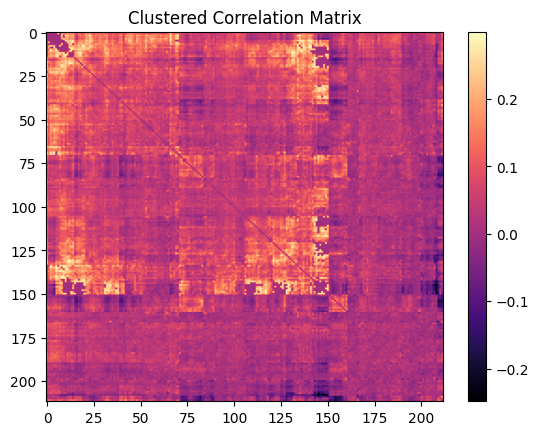

In [170]:
# Plot sorted correlation matrix
#plt.figure(figsize=(6, 5))
plt.title('Clustered Correlation Matrix')
plt.imshow(neo_sorted, aspect='auto', cmap="magma" )
plt.colorbar()


# plt.axhline(y=70, color='r', linestyle='-')
# plt.axhline(y=150, color='r', linestyle='-')

In [171]:

neuron_group1 = ind[::-1][0:70] #ind[140:]
neuron_group2 = ind[::-1][70:150] #ind[60:140]
#ind[140:]

/tmp/ipykernel_2742/15372156.py:17: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  neuron_x.append( sd.neuron_data[0][neuron_ind]["position"][0] )
/tmp/ipykernel_2742/15372156.py:18: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  neuron_y.append( sd.neuron_data[0][neuron_ind]["position"][1] )
/tmp/ipykernel_2742/15372156.py:26: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  neuron_x.append( sd.neuron_data[0][neuron_ind]["position"][0] )
/tmp/ipykernel_2742/15372156.py:27: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  neuron_y

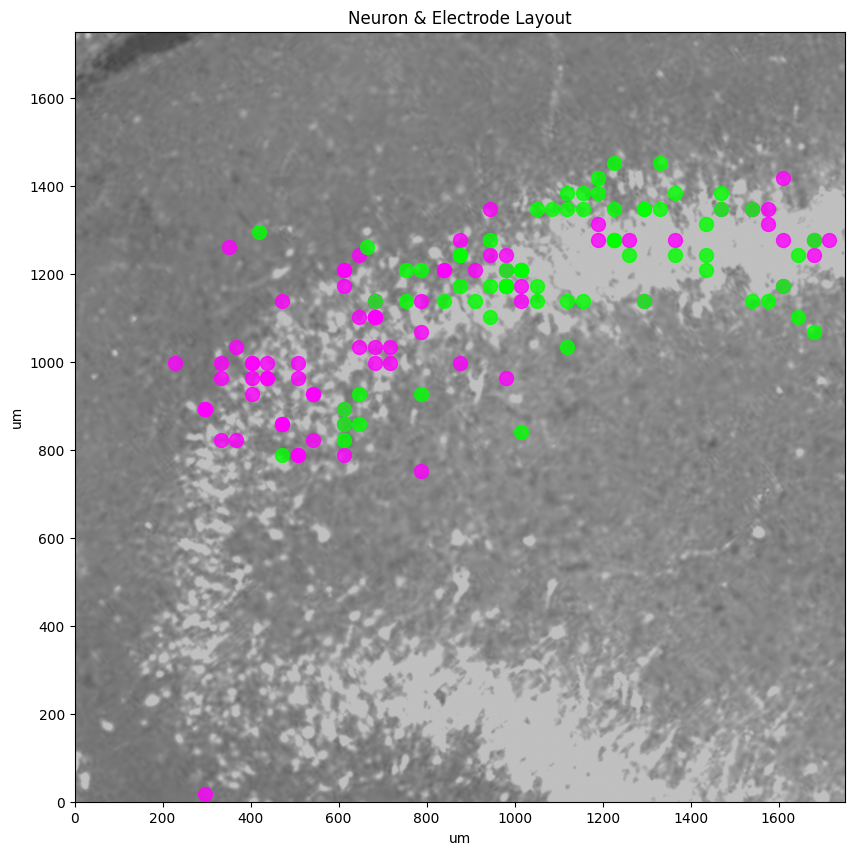

In [174]:
image_path = "/workspaces/human_hippocampus/data/histology/hc112823_bw_old.png"

# Add background image
plt.figure(figsize=(15,10))       # Set image size to roughly the shape of the MEA
img = plt.imread(image_path)      # Load in image
plt.imshow(img,  extent=[0, 3850, 0, 2100]) # Plot image, have it correspond to electrode dimensions

# Plot electrodes
#plt.scatter( electrode_mapping[:,0], electrode_mapping[:,1], s=10, alpha=.6, c="darkorange")


# plot neurons
neuron_x = []
neuron_y = []
#for key,val in sd.neuron_data[0].items():
for neuron_ind in neuron_group2:
    neuron_x.append( sd.neuron_data[0][neuron_ind]["position"][0] )
    neuron_y.append( sd.neuron_data[0][neuron_ind]["position"][1] )
plt.scatter( neuron_x, neuron_y,  c="magenta", alpha=.8, s=100 )  

# plot neurons
neuron_x = []
neuron_y = []
#for key,val in sd.neuron_data[0].items():
for neuron_ind in neuron_group1:
    neuron_x.append( sd.neuron_data[0][neuron_ind]["position"][0] )
    neuron_y.append( sd.neuron_data[0][neuron_ind]["position"][1] )
plt.scatter( neuron_x, neuron_y,  c="lime", alpha=.8, s=100 )  



#add legend, axises limits, labels,  and title
# legend_elements = [Patch(facecolor=electrode_color), Patch(facecolor=neuron_color) ]   # Create colors in legend
# plt.legend(legend_elements, ["Electrode","Neuron"])       # Add legend

plt.xlim( 0, 1750 )                                       # Set axis limits to that of the MEA
plt.ylim( 0, 1750 )
plt.xlabel('um')                                         # add axises and title
plt.ylabel('um')
plt.title(f"Neuron & Electrode Layout")
plt.show()  

# Chip 21769 Clustered

In [4]:
sd = spike_data.read_phy_files("/workspaces/human_hippocampus/data/ephys/2023-12-11-e-Hc120523_aav9hckcr1_chip21769/elliott/elliott_chip21769_2.zip")

(array([   4.,   16.,   50.,   50.,   50.,  112.,  168.,  254.,  384.,
         952., 1118., 1214., 1156.,  996.,  930., 1030.,  980.,  876.,
         798.,  752.,  756.,  764.,  734.,  640.,  660.,  638.,  608.,
         526.,  462.,  476.,  524.,  490.,  428.,  464.,  354.,  318.,
         334.,  280.,  268.,  208.,  252.,  224.,  206.,  190.,  232.,
         230.,  224.,  210.,  214.,  234.,  234.,  256.,  278.,  232.,
         234.,  288.,  216.,  238.,  200.,  204.,  186.,  192.,  194.,
         172.,  202.,  230.,  210.,  240.,  234.,  238.,  220.,  202.,
         228.,  176.,  190.,  172.,  232.,  184.,  190.,  180.,  154.,
         154.,  158.,  210.,  178.,  124.,  120.,   86.,  138.,   86.,
          72.,   48.,   62.,   52.,   40.,   26.,   20.,    2.,    0.,
         180.]),
 array([-0.11707225, -0.10590153, -0.09473081, -0.08356008, -0.07238936,
        -0.06121864, -0.05004792, -0.03887719, -0.02770647, -0.01653575,
        -0.00536503,  0.0058057 ,  0.01697642,  0.028147

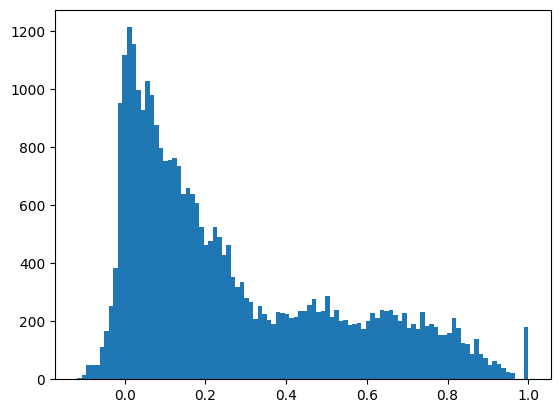

In [5]:
neo = sd.spike_time_tilings()
plt.hist( neo.flatten(), bins=100 )

In [6]:
np.sum(neo.flatten()<0.88)/neo.size

0.9827160493827161

In [7]:
neo = sd.spike_time_tilings()
#sttc_cuttoff = 0.3
sttc_cuttoff = 0.3
neo = np.where( neo<sttc_cuttoff, neo, neo*0 ) #+sttc_cuttoff )
#neo = np.where( neo<sttc_cuttoff, neo, (neo*0)+sttc_cuttoff ) #+sttc_cuttoff )

In [8]:

d = sch.distance.pdist(neo)  # vector of pairwise distances
L = sch.linkage(d, method='complete')  # linkage matrix
ind = sch.leaves_list(sch.optimal_leaf_ordering(L, d))  # optimal leaf ordering


In [9]:
ind = sch.leaves_list(sch.optimal_leaf_ordering(L, d))  # optimal leaf ordering
neo_sorted = neo[ind, :][:, ind]

# Reorder correlation matrix
#neo_sorted = neo[ind, :][:, ind]
# neo_sorted = neo[ind[::-1], :][:, ind]
# for i in range(neo_sorted.shape[0]):
#     neo_sorted[i] = neo_sorted[i][::-1]

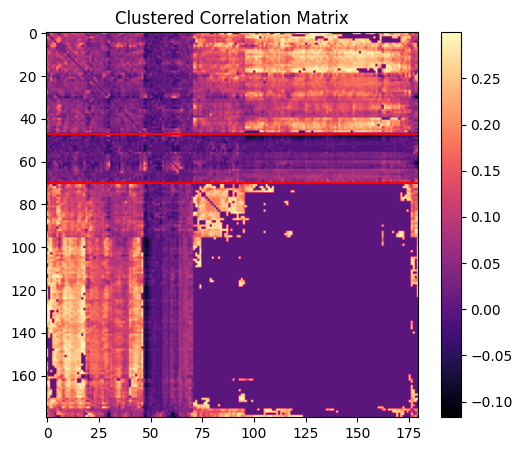

In [10]:
plt.figure(figsize=(6, 5))
plt.title('Clustered Correlation Matrix')
plt.imshow(neo_sorted, aspect='auto', cmap="magma" )
plt.colorbar()


plt.axhline(y=47, color='r', linestyle='-')
plt.axhline(y=70, color='r', linestyle='-')

In [11]:
neuron_group1 = ind[::-1][0:47] #ind[140:]
neuron_group2 = ind[::-1][70:] #ind[60:140]

/tmp/ipykernel_2742/813872362.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values(): # Plots neurons on a 2-d space, representing their positions on the array
/tmp/ipykernel_2742/813872362.py:21: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  neuron_x.append( sd.neuron_data[0][neuron_ind]["position"][0] )
/tmp/ipykernel_2742/813872362.py:22: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  neuron_y.append( sd.neuron_data[0][neuron_ind]["position"][1] )
/tmp/ipykernel_2742/813872362.py:31: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuro

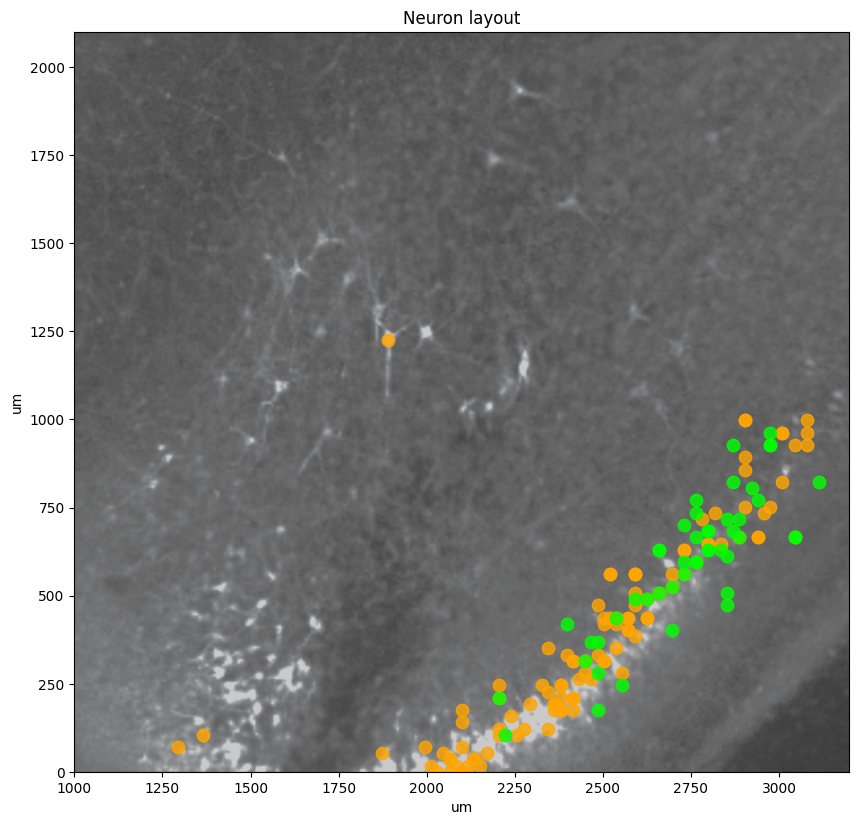

In [12]:
neuron_x = []
neuron_y = []
for neuron in sd.neuron_data[0].values(): # Plots neurons on a 2-d space, representing their positions on the array
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])

plt.figure(figsize=(10,10)) 
img = plt.imread("/workspaces/human_hippocampus/data/histology/chip21769_bw2.png")      # Load in image
plt.imshow(img,  extent=[0, 3850, 0, 2100]) # Plot image, have it correspond to electrode dimensions
#ax = plt.axes()
plt.xlim(1000, 3200)
plt.ylim(0,2100)
#ax.set_facecolor((0.6, 0.6, 0.6)) 


# plot neurons
neuron_x = []
neuron_y = []
#for key,val in sd.neuron_data[0].items():
for neuron_ind in neuron_group2:
    neuron_x.append( sd.neuron_data[0][neuron_ind]["position"][0] )
    neuron_y.append( sd.neuron_data[0][neuron_ind]["position"][1] )
plt.scatter( neuron_x, neuron_y,  c="orange", alpha=.8, s=80 )  


# plot neurons
neuron_x = []
neuron_y = []
#for key,val in sd.neuron_data[0].items():
for neuron_ind in neuron_group1:
    neuron_x.append( sd.neuron_data[0][neuron_ind]["position"][0] )
    neuron_y.append( sd.neuron_data[0][neuron_ind]["position"][1] )
plt.scatter( neuron_x, neuron_y,  c="lime", alpha=.8, s=80 )  



plt.xlabel('um')
plt.ylabel('um')
plt.title("Neuron layout")
#plt.colorbar()
plt.show()


#  <font color="brown">Chip 21769 Higher cutoff

In [175]:
sd = spike_data.read_phy_files("/workspaces/human_hippocampus/data/ephys/2023-12-11-e-Hc120523_aav9hckcr1_chip21769/elliott/elliott_chip21769_2.zip")

(array([   4.,   16.,   50.,   50.,   50.,  112.,  168.,  254.,  384.,
         952., 1118., 1214., 1156.,  996.,  930., 1030.,  980.,  876.,
         798.,  752.,  756.,  764.,  734.,  640.,  660.,  638.,  608.,
         526.,  462.,  476.,  524.,  490.,  428.,  464.,  354.,  318.,
         334.,  280.,  268.,  208.,  252.,  224.,  206.,  190.,  232.,
         230.,  224.,  210.,  214.,  234.,  234.,  256.,  278.,  232.,
         234.,  288.,  216.,  238.,  200.,  204.,  186.,  192.,  194.,
         172.,  202.,  230.,  210.,  240.,  234.,  238.,  220.,  202.,
         228.,  176.,  190.,  172.,  232.,  184.,  190.,  180.,  154.,
         154.,  158.,  210.,  178.,  124.,  120.,   86.,  138.,   86.,
          72.,   48.,   62.,   52.,   40.,   26.,   20.,    2.,    0.,
         180.]),
 array([-0.11707225, -0.10590153, -0.09473081, -0.08356008, -0.07238936,
        -0.06121864, -0.05004792, -0.03887719, -0.02770647, -0.01653575,
        -0.00536503,  0.0058057 ,  0.01697642,  0.028147

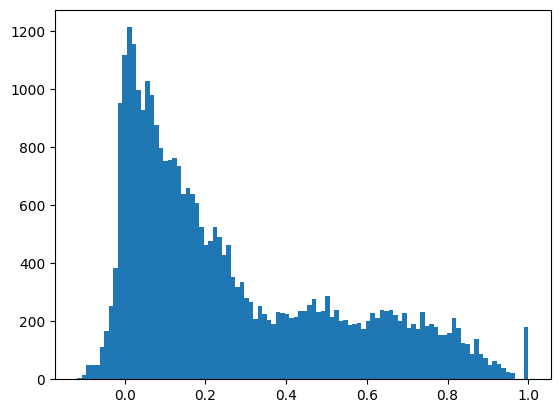

In [176]:
neo = sd.spike_time_tilings()
plt.hist( neo.flatten(), bins=100 )

In [177]:
np.sum(neo.flatten()<0.88)/neo.size

0.9827160493827161

In [178]:
neo = sd.spike_time_tilings()
#sttc_cuttoff = 0.3
sttc_cuttoff = 0.88
neo = np.where( neo<sttc_cuttoff, neo, neo*0 ) #+sttc_cuttoff )
#neo = np.where( neo<sttc_cuttoff, neo, (neo*0)+sttc_cuttoff ) #+sttc_cuttoff )

In [179]:

d = sch.distance.pdist(neo)  # vector of pairwise distances
L = sch.linkage(d, method='complete')  # linkage matrix
ind = sch.leaves_list(sch.optimal_leaf_ordering(L, d))  # optimal leaf ordering


In [180]:
ind = sch.leaves_list(sch.optimal_leaf_ordering(L, d))  # optimal leaf ordering

# Reorder correlation matrix
#neo_sorted = neo[ind, :][:, ind]
neo_sorted = neo[ind[::-1], :][:, ind]
for i in range(neo_sorted.shape[0]):
    neo_sorted[i] = neo_sorted[i][::-1]


# Reorder correlation matrix
#neo_sorted = neo[ind, :][:, ind]
# neo_sorted = neo[ind[::-1], :][:, ind]
# for i in range(neo_sorted.shape[0]):
#     neo_sorted[i] = neo_sorted[i][::-1]

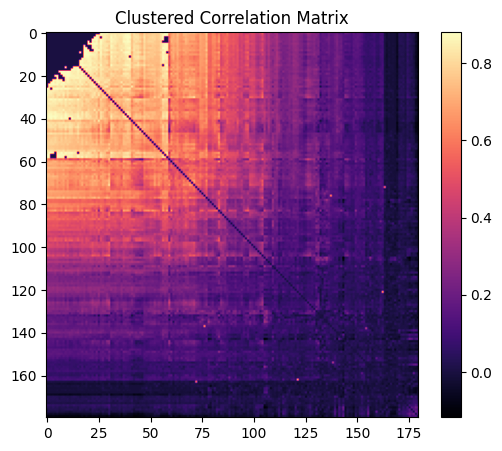

In [181]:
plt.figure(figsize=(6, 5))
plt.title('Clustered Correlation Matrix')
plt.imshow(neo_sorted, aspect='auto', cmap="magma" )
plt.colorbar()

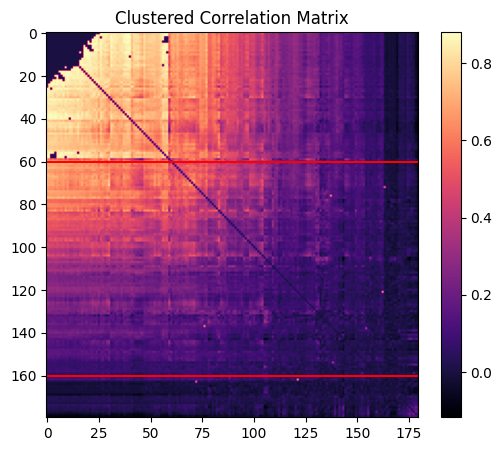

In [186]:
plt.figure(figsize=(6, 5))
plt.title('Clustered Correlation Matrix')
plt.imshow(neo_sorted, aspect='auto', cmap="magma" )
plt.colorbar()


plt.axhline(y=60, color='r', linestyle='-')
plt.axhline(y=160, color='r', linestyle='-')

In [189]:
# neuron_group1 = ind[::-1][0:105] #ind[140:]
# neuron_group2 = ind[::-1][105:160] #ind[60:140]

neuron_group1 = ind[::-1][0:60] #ind[140:]
neuron_group2 = ind[::-1][60:160] #ind[60:140]

/tmp/ipykernel_2742/3241046237.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values(): # Plots neurons on a 2-d space, representing their positions on the array
/tmp/ipykernel_2742/3241046237.py:21: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  neuron_x.append( sd.neuron_data[0][neuron_ind]["position"][0] )
/tmp/ipykernel_2742/3241046237.py:22: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  neuron_y.append( sd.neuron_data[0][neuron_ind]["position"][1] )
/tmp/ipykernel_2742/3241046237.py:31: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of n

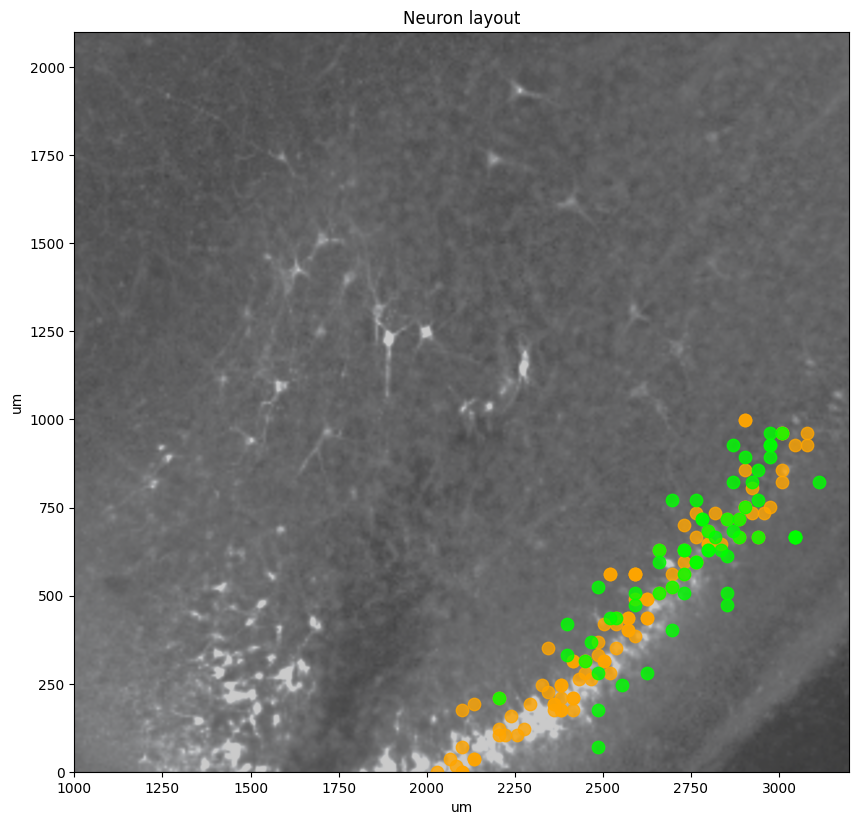

In [190]:
neuron_x = []
neuron_y = []
for neuron in sd.neuron_data[0].values(): # Plots neurons on a 2-d space, representing their positions on the array
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])

plt.figure(figsize=(10,10)) 
img = plt.imread("/workspaces/human_hippocampus/data/histology/chip21769_bw2.png")      # Load in image
plt.imshow(img,  extent=[0, 3850, 0, 2100]) # Plot image, have it correspond to electrode dimensions
#ax = plt.axes()
plt.xlim(1000, 3200)
plt.ylim(0,2100)
#ax.set_facecolor((0.6, 0.6, 0.6)) 


# plot neurons
neuron_x = []
neuron_y = []
#for key,val in sd.neuron_data[0].items():
for neuron_ind in neuron_group2:
    neuron_x.append( sd.neuron_data[0][neuron_ind]["position"][0] )
    neuron_y.append( sd.neuron_data[0][neuron_ind]["position"][1] )
plt.scatter( neuron_x, neuron_y,  c="orange", alpha=.8, s=80 )  


# plot neurons
neuron_x = []
neuron_y = []
#for key,val in sd.neuron_data[0].items():
for neuron_ind in neuron_group1:
    neuron_x.append( sd.neuron_data[0][neuron_ind]["position"][0] )
    neuron_y.append( sd.neuron_data[0][neuron_ind]["position"][1] )
plt.scatter( neuron_x, neuron_y,  c="lime", alpha=.8, s=80 )  



plt.xlabel('um')
plt.ylabel('um')
plt.title("Neuron layout")
#plt.colorbar()
plt.show()